In [1]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from stock_list import stocklist

In [3]:
stocklist.keys()

dict_keys(['sharpe_stocks', 'drawdown_stocks', 'esg_stocks2', 'esg_stock_ndsv', 'pe_stocks', 'test'])

In [4]:
selected_stocks = stocklist['esg_stocks2']
start_date = '2020-01-01'
end_date = '2021-01-01'

In [5]:
def get_data(stock, start_date, end_date):
    data = yf.download(stock + '.NS', start=start_date, end=end_date)
    return data

In [6]:
df = pd.DataFrame()
for stock in selected_stocks:
    data = get_data(stock, start_date, end_date)
    df[stock] = data['Close']

df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,HINDZINC,INDUSINDBK,TATACHEM,CUMMINSIND,TECHM,APOLLOTYRE,TCS,OFSS,ABB,INFY,...,NETWORK18,KEC,NEULANDLAB,STYRENIX,KIRLOSBROS,JUBLPHARMA,HIL,ENGINERSIN,INDIAGLYCO,EDELWEISS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,210.100006,1484.300049,295.996399,552.150024,762.099976,163.350006,2167.600098,2736.149902,1290.000000,736.849976,...,24.250000,304.500000,418.799988,723.549988,142.800003,399.721130,1264.349976,98.750000,228.699997,59.619141
2020-01-02,214.149994,1529.000000,296.635681,569.049988,766.049988,170.350006,2157.649902,2721.949951,1294.199951,734.700012,...,25.250000,310.549988,430.450012,724.599976,147.199997,401.709808,1381.050049,99.199997,232.850006,64.997292
2020-01-03,215.250000,1528.849976,295.423218,573.000000,775.099976,165.149994,2200.649902,2717.100098,1322.250000,746.000000,...,24.799999,311.450012,430.450012,730.799988,149.949997,407.488190,1353.300049,100.050003,226.750000,64.456779
2020-01-06,211.850006,1469.400024,290.881989,570.700012,770.400024,160.500000,2200.449951,2688.550049,1287.000000,738.849976,...,24.400000,303.450012,421.950012,724.799988,148.000000,396.043976,1289.300049,98.400002,214.649994,60.700176
2020-01-07,213.050003,1461.650024,293.769867,573.549988,777.099976,161.250000,2205.850098,2669.399902,1306.750000,727.900024,...,24.400000,307.299988,421.350006,739.150024,146.100006,399.270874,1301.250000,98.849998,221.050003,62.213627


In [7]:
esg_data = pd.read_json('esg_data.json')

In [8]:
esg_data.head()

,esg,esg_industry,industry,name,ticker
0,[],[],Mining (except Oil & Gas),20-Microns-Ltd,20MICRONS
1,"[[1622505600000, 14.44], [1625097600000, 14.46...","[[1622505600000, 13.83], [1625097600000, 12.9]...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA
2,"[[1633046400000, 36.21], [1635724800000, 35.68...","[[1633046400000, 19.94], [1635724800000, 20.25...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA
3,[],[],Brokerage & Capital Markets,A-K-CAPITAL-SERVICES-LIMITED,530499
4,[],[],"Architectural, Engineering, & Related Services",A2Z-MAINTENANCE-and-ENGINEERING-SERVICES-LIMITED,A2ZINFRA


In [9]:
esg_data = esg_data[esg_data['ticker'].isin(selected_stocks)]
esg_data = esg_data.set_index('ticker')
esg_data.head()
# drop the row with name Nabha-Power-Limited
esg_data = esg_data[esg_data['name'] != 'Nabha-Power-Limited']

In [10]:
ESG_score_df = pd.DataFrame()
for ticker in selected_stocks:
    print(ticker)
    sum = 0
    n = 0
    for el in esg_data.loc[ticker]['esg']:
      n = n + 1
      sum = sum + el[1]

    ESG_score_df[ticker] = [sum/n]

ESG_score_df = ESG_score_df.T
ESG_score_df.columns = ['ESG_score']
ESG_score_df.head()   

HINDZINC
INDUSINDBK
TATACHEM
CUMMINSIND
TECHM
APOLLOTYRE
TCS
OFSS
ABB
INFY
HDFCBANK
SAIL
GAIL
LT
GODREJCP
TATACOMM
AMBUJACEM
JKCEMENT
HEROMOTOCO
DRREDDY
RELINFRA
EXIDEIND
IDFC
STLTECH
SUZLON
PEL
GLENMARK
SUNTV
BRIGADE
BLUESTARCO
NETWORK18
KEC
NEULANDLAB
STYRENIX
KIRLOSBROS
JUBLPHARMA
HIL
ENGINERSIN
INDIAGLYCO
EDELWEISS


,ESG_score
HINDZINC,99.2976
INDUSINDBK,97.9748
TATACHEM,97.7936
CUMMINSIND,96.7960
TECHM,96.7716


In [11]:
esg_data[esg_data.index == 'LT']

,esg,esg_industry,industry,name
ticker,,,,
LT,"[[1619827200000, 89.93], [1622505600000, 93.2]...","[[1619827200000, 81.17], [1622505600000, 82.59...","Heavy & Civil Engineering Construction, Electr...",Larsen-and-Toubro


In [12]:
from plot import generate_plot

In [17]:
Sigma = df.pct_change().apply(lambda x: np.log(1+x)).cov()
Esg_score = ESG_score_df['ESG_score']
mu = df.pct_change().apply(lambda x: np.log(1+x)).mean()
u_values = np.linspace(0, 0.8, 100)
l_values = np.linspace(50, 100, 100)

In [18]:
Sigma

,HINDZINC,INDUSINDBK,TATACHEM,CUMMINSIND,TECHM,APOLLOTYRE,TCS,OFSS,ABB,INFY,...,NETWORK18,KEC,NEULANDLAB,STYRENIX,KIRLOSBROS,JUBLPHARMA,HIL,ENGINERSIN,INDIAGLYCO,EDELWEISS
HINDZINC,0.000773,0.000300,0.000214,0.000111,0.000247,0.000331,0.000173,0.000227,0.000190,0.000183,...,0.000191,0.000175,0.000238,0.000190,0.000331,0.000320,0.000397,0.000259,0.000290,0.000244
INDUSINDBK,0.000300,0.003007,0.000661,0.000449,0.000492,0.000874,0.000369,0.000551,0.000407,0.000559,...,0.000537,0.000657,0.000516,0.000661,0.000810,0.000614,0.000855,0.000351,0.000811,0.000847
TATACHEM,0.000214,0.000661,0.000611,0.000196,0.000278,0.000370,0.000206,0.000240,0.000188,0.000256,...,0.000230,0.000342,0.000257,0.000320,0.000443,0.000363,0.000443,0.000321,0.000446,0.000397
CUMMINSIND,0.000111,0.000449,0.000196,0.000693,0.000196,0.000318,0.000096,0.000094,0.000154,0.000118,...,0.000174,0.000344,0.000192,0.000204,0.000227,0.000222,0.000256,0.000207,0.000253,0.000209
TECHM,0.000247,0.000492,0.000278,0.000196,0.000723,0.000383,0.000357,0.000320,0.000229,0.000424,...,0.000229,0.000363,0.000329,0.000219,0.000354,0.000332,0.000356,0.000295,0.000387,0.000339
APOLLOTYRE,0.000331,0.000874,0.000370,0.000318,0.000383,0.000999,0.000302,0.000280,0.000344,0.000315,...,0.000393,0.000471,0.000328,0.000379,0.000576,0.000443,0.000618,0.000406,0.000568,0.000477
TCS,0.000173,0.000369,0.000206,0.000096,0.000357,0.000302,0.000487,0.000216,0.000149,0.000409,...,0.000180,0.000280,0.000194,0.000169,0.000223,0.000231,0.000183,0.000211,0.000290,0.000183
OFSS,0.000227,0.000551,0.000240,0.000094,0.000320,0.000280,0.000216,0.000656,0.000206,0.000273,...,0.000171,0.000232,0.000196,0.000192,0.000230,0.000314,0.000283,0.000206,0.000305,0.000278
ABB,0.000190,0.000407,0.000188,0.000154,0.000229,0.000344,0.000149,0.000206,0.000535,0.000143,...,0.000217,0.000286,0.000135,0.000231,0.000252,0.000266,0.000296,0.000207,0.000199,0.000326
INFY,0.000183,0.000559,0.000256,0.000118,0.000424,0.000315,0.000409,0.000273,0.000143,0.000633,...,0.000184,0.000272,0.000273,0.000210,0.000337,0.000247,0.000295,0.000262,0.000367,0.000238


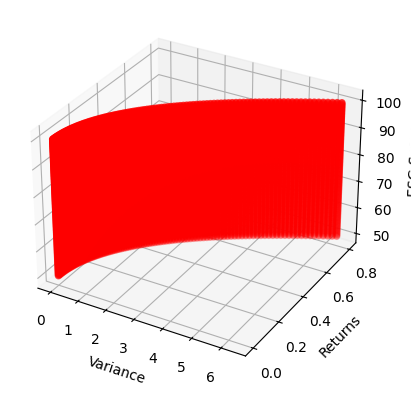

In [19]:
generate_plot(Sigma, mu, Esg_score, u_values, l_values)